In [1]:
import pandas as pd



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../data/highly_relevant_posts_descending_threshold_50.csv')

In [4]:
df.drop(['subreddit','created_utc','over_18'], axis=1)

,title,selftext,date_created,combined_text,processed_text,relevance_probability
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.000000
1,What combination of meds finally worked for yo...,right now i’m on:\nprozac 40mg\nwellbutrin xl ...,2020-06-25 14:47:27,What combination of meds finally worked for yo...,combination med finally worked hasn’t worked r...,1.000000
2,Does anyone have any experience(s) with any an...,"i abused benzodiazepines, so i cannot trust my...",2015-10-12 02:36:25,Does anyone have any experience(s) with any an...,anyone experience anxiolytic medicine besides ...,1.000000
3,My experience with lamictal/lamotrigine,this is going to be a very long post because i...,2021-08-12 14:13:55,My experience with lamictal/lamotrigine this i...,experience lamictallamotrigine going long post...,1.000000
4,How did antidepressants modify your behavior a...,"hello, i'd like to know :\n\n1) if you've been...",2020-01-31 18:47:16,How did antidepressants modify your behavior a...,antidepressant modify behavior cognition hello...,1.000000
...,...,...,...,...,...,...
2551,Meds seem to not be working.,i keep adding another flare but when i post an...,2021-09-13 22:10:20,Meds seem to not be working. i keep adding ano...,med seem working keep adding another flare pos...,0.500361
2552,Do you ever feel like your medication is actua...,i've been on lamotrigine for 7 months now. i w...,2020-05-08 03:11:07,Do you ever feel like your medication is actua...,ever feel like medication actually making feel...,0.500314
2553,Meds question,hi i was just wondering is anyone on mood stab...,2019-01-14 13:16:56,Meds question hi i was just wondering is anyon...,med question hi wondering anyone mood stabiliz...,0.500182
2554,"I feel much happier, but also far more depress...",i started dating my first boyfriend a couple m...,2021-01-08 05:41:46,"I feel much happier, but also far more depress...",feel much happier also far depressed boyfriend...,0.500148


In [5]:
from drug_named_entity_recognition import find_drugs

[({'name': 'Acetaminophen', 'synonyms': {'Hydroxyacetanilide', 'Paracetamol', 'Panadol', 'Acephen', 'Acetominophen', 'Acenol', 'Tylenol', 'Datril', 'Actamin', 'Paracetamolum', 'Ofirmev', 'Acetaco', 'Acetamidophenol', 'Acetaminophen', 'Acamol', 'Algotropyl'}, 'medline_plus_id': 'a621016', 'generic_names': ['Acetaminophen'], 'mesh_id': 'D058633', 'drugbank_id': 'DB00316', 'wikipedia_url': 'https://en.wikipedia.org/wiki/Paracetamol'}, 2, 2)]


In [6]:
def get_drug_list(text):
    drug_tuples = find_drugs(text.split(" "), is_ignore_case=True)
    drug_names = [drug[0] for drug in drug_tuples]
    drug_list= [drug.get('name') for drug in drug_names]
    unique_drug_list = sorted(set(drug_list))
    return unique_drug_list

In [7]:
df['drug_list'] =df['processed_text'].apply(get_drug_list)

In [8]:
from collections import defaultdict


def build_medication_index(df, column_name):
    med_index = defaultdict(list)
    for idx, row in df.iterrows():
        for med in row[column_name]:
            med_index[med].append(idx)
    return med_index

def find_medication_with_index(med_index, df, medication_name):
    if medication_name in med_index:
        matching_indices = med_index[medication_name]
        return df.loc[matching_indices]
    else:
        return pd.DataFrame()  # Return empty DataFrame if medication not found

# Build the index
med_index = build_medication_index(df, 'drug_list')



In [9]:
def get_synonyms(medication):
    drug_tuples = find_drugs(medication.split(" "), is_ignore_case=True)
    drug_names = [drug[0] for drug in drug_tuples]
    drug_list= [drug.get('synonyms') for drug in drug_names]
    return drug_list

In [10]:
def synonym_list_string(medication):
    return str(get_synonyms(medication_name)).strip('[,],{,}')

#### Wordclouds

I'm going to leave the WordCloud code in, because I think generating a word cloud of the sentiment analysis is going to give some pretty striking images.

The third most frequently discussed medication is: Quetiapine


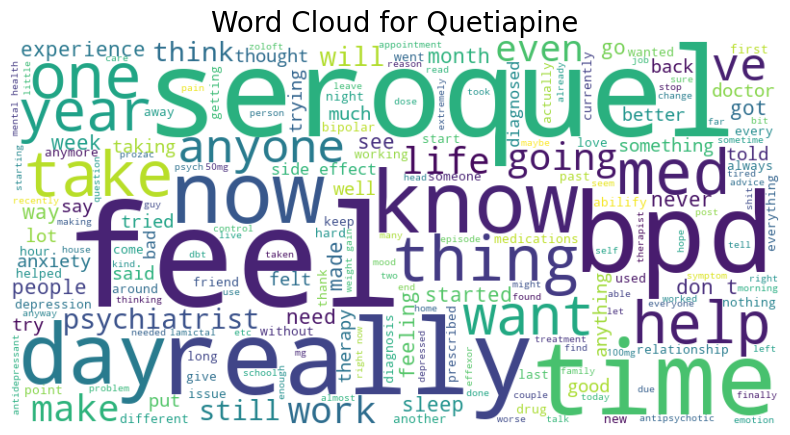

In [15]:
from wordcloud import WordCloud, STOPWORDS



# Find the most frequently discussed medication
drug_frequencies = df['drug_list'].explode().value_counts()
drug_frequencies.nlargest(3)

second_most_frequent_medication = 'Quetiapine'

print(f"The third most frequently discussed medication is: {second_most_frequent_medication}")

# Filter rows containing the most frequently discussed medication
filtered_df = df[df['drug_list'].apply(lambda x: second_most_frequent_medication in x)]

# Combine the 'combined_text' of those rows
combined_text = " ".join(filtered_df['combined_text'])

# Define additional stopwords if needed
stopwords = set(STOPWORDS)
additional_stopwords = {"medication", "passage","quetiapine","s","m","fucking"}  # Add custom stopwords here
stopwords.update(additional_stopwords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for {second_most_frequent_medication}", fontsize=20)
plt.show()


#### OpenAI sentiment analysis

We can also run sentiment analysis. Let's first figure out how large things are if we try to run sentiment analysis for Lamotrigine. Basically, this tells us how expensive it will be.

In [16]:
import tiktoken

combined_text = ' '.join(df["combined_text"])

# Initialize the encoder
enc = tiktoken.encoding_for_model("gpt-3.5")

# Count the tokens
num_tokens = len(enc.encode(combined_text))
print(f"Number of tokens: {num_tokens}")

Number of tokens: 1072666


So it will be roughly 5 dollars to run this through the entire data set. Let's determine the rough cost for running it for 'Quetiapine'

In [17]:
df_Quetiapine=df[df['drug_list'].apply(lambda x: 'Quetiapine' in x)]
combined_text_Quetiapine = ' '.join(df_Quetiapine["combined_text"])
num_tokens = len(enc.encode(combined_text_Quetiapine))
print(f"Number of tokens: {num_tokens}")

Number of tokens: 150042


In [19]:
import openai
import os

# Set your OpenAI API key
# You will need to replace this with your key if you want to run this model
api_key = 'Your_API_Key'

# Check if the API key is available
if api_key is None:
    raise ValueError("API key is not set. Please set the OPENAI_API_KEY environment variable.")

openai.api_key = api_key

# Define a function to generate a response using GPT-3.5
def generate_response(prompt):
    try:
        response = openai.completions.create(
            model="gpt-3.5-turbo-instruct",  # Use appropriate engine
            prompt=prompt,
            max_tokens=150,
            n=1,
            stop=None,
            temperature=0.3,
        )
        return response.choices[0].text.strip()
    except Exception as e:
        print(f"Error generating response: {e}")
        return None

if __name__ == "__main__":
    # Example prompt
    prompt = "Tell me a joke."

    # Generate and print the response
    response = generate_response(prompt) #Commented out to avoid unnecessary runs
    if response:
        print("Generated Response:\n", response)
    else:
        print("Failed to generate response.")


Generated Response:
 Why don't scientists trust atoms?

Because they make up everything.


In [20]:
# I need this snippet to determine how many tokens to use

# Calculate the number of tokens in each 'combined_text'
df['token_count'] = df['combined_text'].apply(lambda text: len(enc.encode(text)))

# Find the index of the row with the greatest number of tokens
max_tokens = df['token_count'].max()

In [21]:
print(max_tokens)

7242


If I want to run GPT-4o, I have 8000 tokens available per request. The prompt is roughly 400 and I want to save 300 for the response. To be safe, I'm going to cut this down quite a bit more.



In [22]:
# Filter rows where the number of tokens exceeds 5000
high_token_rows = df[df['token_count'] > 5000]

print("Rows where the number of tokens exceeds 2900:")
high_token_rows.info()

Rows where the number of tokens exceeds 2900:
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 198 to 1097
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3 non-null      object 
 1   selftext               3 non-null      object 
 2   created_utc            3 non-null      int64  
 3   over_18                3 non-null      bool   
 4   subreddit              3 non-null      object 
 5   date_created           3 non-null      object 
 6   combined_text          3 non-null      object 
 7   processed_text         3 non-null      object 
 8   relevance_probability  3 non-null      float64
 9   drug_list              3 non-null      object 
 10  token_count            3 non-null      int64  
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 267.0+ bytes


Fortunately, there are only 3 rows where this is an issue. We can manually code these.

In [23]:
# Function to get sentiment and reason for a given medication from text
def get_medication_sentiment(medication_name, text):
    # Initialize the tokenizer for GPT-3.5 using gpt2 encoding
    enc = tiktoken.encoding_for_model("gpt-3.5")
    
    # Calculate the number of tokens
    token_count = len(enc.encode(text))
    
    # Check if the number of tokens exceeds 5000
    if token_count > 5000:
        return {'sentiment': 'unknown', 'reason': 'Text too long to analyze'} 

    #Create the prompt string
    prompt = (f"The passage enclosed by `` `` contains some discussion about the medication {medication_name} "
          f"(perhaps referring to it with a synonym from the list '{synonym_list_string(medication_name)}'). "
          f"The text must be taken as is and cannot be used to further a conversation. "
          f"The response should only consider this medication and none others. Please format the output as a "
          f"dictionary with the following keys, 'sentiment', 'reason'. For 'sentiment,' respond with '1' if the "
          f"poster took the medication and it helped their condition, even if there are minor side effects or the medication did not "
          f"fully resolve the symptoms. Respond with '-1' if the medication did not help the poster or if there were major adverse affects. Respond with "
          f"'0' if the discussion of the medication is neutral and respond with '-' if there is not enough information "
          f"to make a conclusion or if the poster has not taken the medication. 'Reason' should be a short string (approximately one sentence) about the experience the poster had with "
          f"the medication, including effectiveness, side effects, interactions with other medications, or addictions: "
          f"``{text}``")  
    response = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{'role': "user", 'content':prompt}],
    max_tokens=300,
    temperature=0.1,
        stop=None
    )
    
    return response.choices[0].message.content


In [26]:
medication_name = 'Quetiapine'

In [27]:
medication_name

'Quetiapine'

In [28]:
# Function to analyze sentiment for a specified medication
def analyze_medication_sentiment(df, medication_name):
    # Apply the get_medication_sentiment function to each row in the DataFrame
    df[f'reponse_{medication_name}'] = df['combined_text'].apply(lambda text: get_medication_sentiment(text, medication_name))
    return df


In [30]:
df_Quetiapine.head()

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",1602953594,False,BPD,2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.0,"[Alprazolam, Amitriptyline, Aripiprazole, Cita..."
1,What combination of meds finally worked for yo...,right now i’m on:\nprozac 40mg\nwellbutrin xl ...,1593096447,False,BPD,2020-06-25 14:47:27,What combination of meds finally worked for yo...,combination med finally worked hasn’t worked r...,1.0,"[Alprazolam, Amphetamine, Aripiprazole, Buprop..."
4,How did antidepressants modify your behavior a...,"hello, i'd like to know :\n\n1) if you've been...",1580496436,False,BPD,2020-01-31 18:47:16,How did antidepressants modify your behavior a...,antidepressant modify behavior cognition hello...,1.0,"[Aripiprazole, Brexpiprazole, Escitalopram, Li..."
5,Medication,"i've never posted in this sub before, but i lo...",1475113777,False,BPD,2016-09-29 01:49:37,Medication i've never posted in this sub befor...,medication ive never posted sub love read ever...,1.0,"[Bupropion, Clonazepam, Dextroamphetamine, Esc..."
7,Recently Diagnosed - What do I do next? My story,"hello, \n\ntldr: what do i do next? recently ...",1624689032,False,BPD,2021-06-26 06:30:32,Recently Diagnosed - What do I do next? My sto...,recently diagnosed next story hello tldr next ...,1.0,"[Aripiprazole, Bupropion, Escitalopram, Lisdex..."


I'm being extremely careful with initializing the medication name because if I run it for the wrong medication, I get the wrong collection and I only have about 5 of these runs total.

In [31]:
# Running ChatGPT on the posts
#### WARNING: DO NOT RUN THIS MULTIPLE TIMES. IT COSTS ALMOST 2 DOLLARS FOR EACH RUN.
#### ONLY RUN ONCE.
#The call to the API has been commented out to avoid extra runs.



medication_name = 'Quetiapine'
# Using the evaluation function for sentiment
#results_df = analyze_medication_sentiment(df_Quetiapine, medication_name)

results_df.to_csv('../data/Quetiapine_sentiments_4o.csv', index=False)

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_86568/1799300614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'reponse_{medication_name}'] = df['combined_text'].apply(lambda text: get_medication_sentiment(text, medication_name))


In [26]:
results_df.info

<bound method DataFrame.info of                                                   title  \
0     Informal survey: What (legal) drugs, if any, '...   
2     Does anyone have any experience(s) with any an...   
4     How did antidepressants modify your behavior a...   
5                                            Medication   
6     New doctor wants me to go off antidepressants ...   
...                                                 ...   
2539                     zoloft caused hallucinations!!   
2540                                      Bpd and IBS??   
2543                                        Help please   
2551                       Meds seem to not be working.   
2554  I feel much happier, but also far more depress...   

                                               selftext  created_utc  over_18  \
0     hi! so i'm officially diagnosed, tried dbt but...   1602953594    False   
2     i abused benzodiazepines, so i cannot trust my...   1444617385    False   
4     hello, i'd

Reading through the document this created, this has done an excellent job of sentiment analysis. I've printed to a CSV just to be sure not to overwrite things.

In [32]:
#Just for posterioty, here is the prompt used to generate the sentiments.

medication_name = 'Quetiapine'

prompt = (f"The passage enclosed by `` `` contains some discussion about the medication {medication_name} "
          f"(perhaps referring to it with a synonym from the list '{synonym_list_string(medication_name)}'). "
          f"The text must be taken as is and cannot be used to further a conversation. "
          f"The response should only consider this medication and none others. Please format the output as a "
          f"dictionary with the following keys, 'sentiment', 'reason'. For 'sentiment,' respond with '1' if the "
          f"poster took the medication and it helped their condition, even if there are minor side effects or the medication did not "
          f"fully resolve the symptoms. Respond with '-1' if the medication did not help the poster or if there were major adverse affects. Respond with "
          f"'0' if the discussion of the medication is neutral and respond with '-' if there is not enough information "
          f"to make a conclusion or if the poster has not taken the medication. 'Reason' should be a short string (approximately one sentence) about the experience the poster had with "
          f"the medication, including effectiveness, side effects, interactions with other medications, or addictions: "
          f"``input text``")  

print(prompt)

The passage enclosed by `` `` contains some discussion about the medication Quetiapine (perhaps referring to it with a synonym from the list ''Seroquel', 'Quetiapine', 'Quetiapina', 'Quetiapinum''). The text must be taken as is and cannot be used to further a conversation. The response should only consider this medication and none others. Please format the output as a dictionary with the following keys, 'sentiment', 'reason'. For 'sentiment,' respond with '1' if the poster took the medication and it helped their condition, even if there are minor side effects or the medication did not fully resolve the symptoms. Respond with '-1' if the medication did not help the poster or if there were major adverse affects. Respond with '0' if the discussion of the medication is neutral and respond with '-' if there is not enough information to make a conclusion or if the poster has not taken the medication. 'Reason' should be a short string (approximately one sentence) about the experience the post